In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0 --> Covid , 1 --> Normal

# 1) Image Preprocessing

## a) Creating datagenerators for Data Augmentation (DA on only Train , rest just rescaling)

In [60]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    vertical_flip=True,
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range=20,
    zoom_range=0.3
)

val_datagen = ImageDataGenerator(
    rescale=1/255
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

In [61]:
Height = 224
Width = 224
Channel = 3
Batch_Size = 32

## b) Augmented Data using .flow_from_directory ie using file path, ( IMP ) shuffle=False for test data

In [62]:
train_data = train_datagen.flow_from_directory(
    "New_XRay_Dataset/Train",
    target_size=(Height,Width),
    batch_size=Batch_Size,
    class_mode="binary"
)

Found 288 images belonging to 2 classes.


In [63]:
val_data = val_datagen.flow_from_directory(
    "New_XRay_Dataset/Val",
    target_size=(Height,Width),
    batch_size=Batch_Size,
    class_mode="binary"
)

Found 60 images belonging to 2 classes.


In [177]:
test_data = test_datagen.flow_from_directory(
    "New_XRay_Dataset/Prediction",
    target_size=(Height,Width),
    batch_size=Batch_Size,
    class_mode="binary",
    shuffle=False
)

Found 53 images belonging to 2 classes.


## c) Displaying some augmented train images with their labels

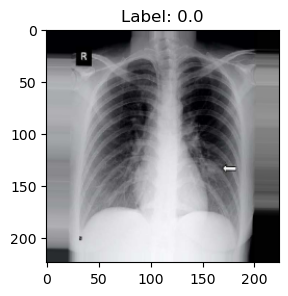

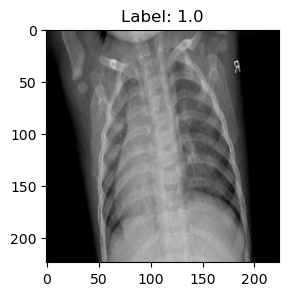

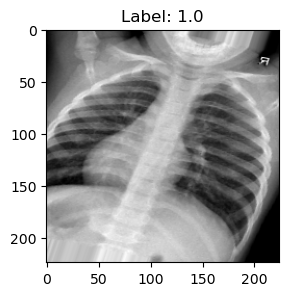

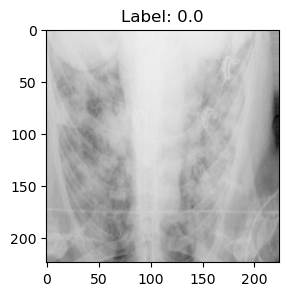

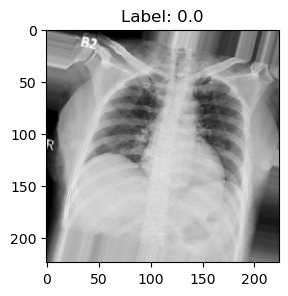

In [360]:
images_array,train_labels = next(train_data) 

n = 5
for i in range(n):
    plt.figure(figsize=(3,7))
    plt.imshow(images_array[i])
    plt.title(f"Label: {train_labels[i]}")
    
plt.show();


In [258]:
test_data.class_indices

{'Covid': 0, 'Normal': 1}

# 2) Creating a Sequential Model of CNN 

In [232]:
cnn_model = tf.keras.models.Sequential()

cnn_model.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=(3,3),
                                     input_shape=(Height,Width,Channel),
                                     activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3,3),
                                     activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3,3),
                                     activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3,3),
                                     activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3,3),
                                     activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
cnn_model.add(tf.keras.layers.Dropout(0.25))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [233]:
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_49 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 54, 54, 64)      

## Compiling

In [234]:
cnn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

## Training

In [235]:
history = cnn_model.fit(train_data,
                        epochs=19,
                        validation_data=val_data,
                        validation_steps=2)

Epoch 1/19
9/9 [==============================] - 18s 2s/step - loss: 0.7137 - accuracy: 0.5104 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/19
9/9 [==============================] - 16s 2s/step - loss: 0.6853 - accuracy: 0.5104 - val_loss: 0.6919 - val_accuracy: 0.5833
Epoch 3/19
9/9 [==============================] - 16s 2s/step - loss: 0.6743 - accuracy: 0.6076 - val_loss: 0.6814 - val_accuracy: 0.7667
Epoch 4/19
9/9 [==============================] - 17s 2s/step - loss: 0.6400 - accuracy: 0.6181 - val_loss: 0.6532 - val_accuracy: 0.8500
Epoch 5/19
9/9 [==============================] - 16s 2s/step - loss: 0.5946 - accuracy: 0.6701 - val_loss: 0.5552 - val_accuracy: 0.7167
Epoch 6/19
9/9 [==============================] - 17s 2s/step - loss: 0.6167 - accuracy: 0.6632 - val_loss: 0.6093 - val_accuracy: 0.8833
Epoch 7/19
9/9 [==============================] - 16s 2s/step - loss: 0.5301 - accuracy: 0.7431 - val_loss: 0.4614 - val_accuracy: 0.8500
Epoch 8/19
9/9 [==================

# Displaying Loss and Accuracy of training

In [326]:
def plot_History(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1,len(loss)+1)

    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,7),dpi=179)
    
    axes[0].plot(epochs,loss,"o--",label="Train loss")
    axes[0].plot(epochs,val_loss,"rD:",label="Val loss")
    axes[0].set_xlabel("Epochs",fontsize=17)
    axes[0].set_ylabel("Loss",fontsize=17)
    axes[0].set_title("Loss vs Epochs",fontsize=17)
    axes[0].legend()
    
    axes[1].plot(epochs,acc,"o--",label="Train accuracy")
    axes[1].plot(epochs,val_acc,"rD:",label="Val accuracy")
    axes[1].set_xlabel("Epochs",fontsize=17)
    axes[1].set_ylabel("Accuracy",fontsize=17)
    axes[1].set_title("Accuracy vs Epochs",fontsize=17)
    axes[1].legend()
    plt.tight_layout();

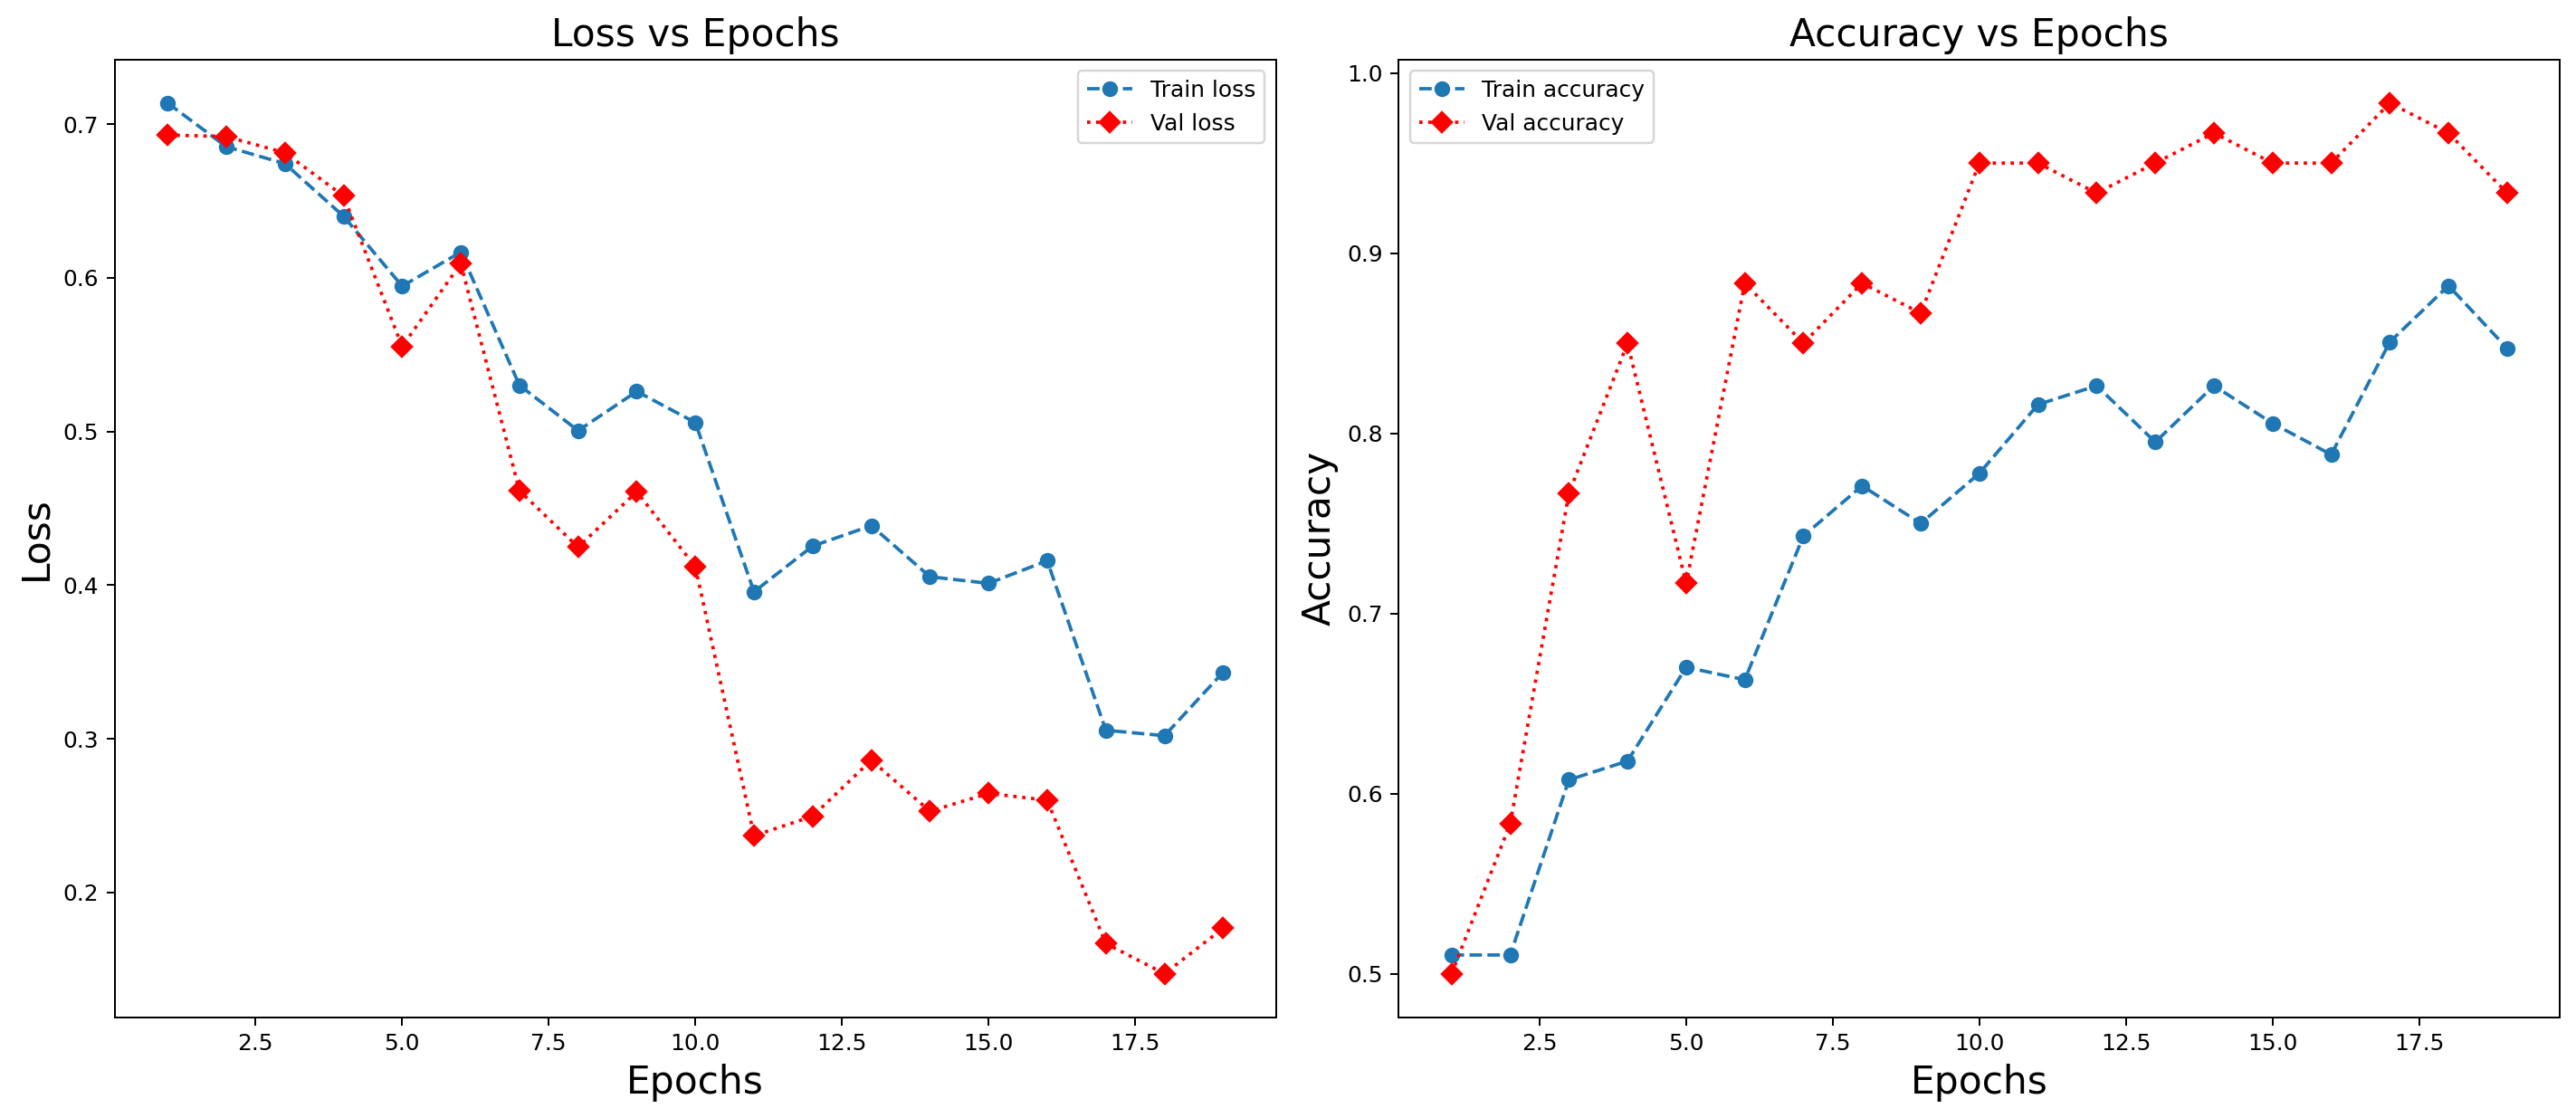

In [327]:
plot_History(history)

## Evaluating model on Train data  

In [241]:
cnn_model.evaluate(train_data)

9/9 [==============================] - 9s 927ms/step - loss: 0.3097 - accuracy: 0.8993


[0.3097306489944458, 0.8993055820465088]

## Evaluating model on Validation data  

In [242]:
cnn_model.evaluate(val_data)

2/2 [==============================] - 2s 793ms/step - loss: 0.1767 - accuracy: 0.9333


[0.17667505145072937, 0.9333333373069763]

## Evaluating model on Test data ( 100 % accuracy )  

In [243]:
cnn_model.evaluate(test_data)

2/2 [==============================] - 1s 152ms/step - loss: 0.1948 - accuracy: 1.0000


[0.19484664499759674, 1.0]

# 3) Making Predictions 

In [259]:
y_pred = cnn_model.predict(test_data)

2/2 [==============================] - 1s 316ms/step


In [260]:
y_pred

array([[0.29910102],
       [0.20394368],
       [0.27035752],
       [0.18936642],
       [0.18256006],
       [0.21201305],
       [0.23640992],
       [0.15777257],
       [0.15030813],
       [0.22500485],
       [0.31510633],
       [0.3326603 ],
       [0.42054972],
       [0.08880169],
       [0.15123548],
       [0.22869764],
       [0.4857298 ],
       [0.10229822],
       [0.23778154],
       [0.33290923],
       [0.27310255],
       [0.9899259 ],
       [0.6702336 ],
       [0.9729887 ],
       [0.6254682 ],
       [0.9591682 ],
       [0.54394734],
       [0.95989746],
       [0.9433109 ],
       [0.96638167],
       [0.6400257 ],
       [0.9655165 ],
       [0.96685934],
       [0.61940676],
       [0.7664133 ],
       [0.9504433 ],
       [0.983555  ],
       [0.88114935],
       [0.97852474],
       [0.81689227],
       [0.9657942 ],
       [0.9494958 ],
       [0.91876376],
       [0.96545154],
       [0.78091174],
       [0.95641536],
       [0.89787585],
       [0.988

In [261]:
y_pred = [1 if val > 0.5 else 0 for val in y_pred]

In [262]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [263]:
a = np.array(y_pred)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [264]:
df = pd.DataFrame(test_data.labels,y_pred)

In [265]:
df

,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0
0,0


# Classification Report of Model 

In [266]:
print(classification_report(test_data.labels,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        32

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [267]:
Image = image.load_img("New_XRay_Dataset/Prediction/Covid/ryct.2020200028.fig1a.jpeg",target_size=(Height,Width))

In [268]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

# Confusion Matrix of Model

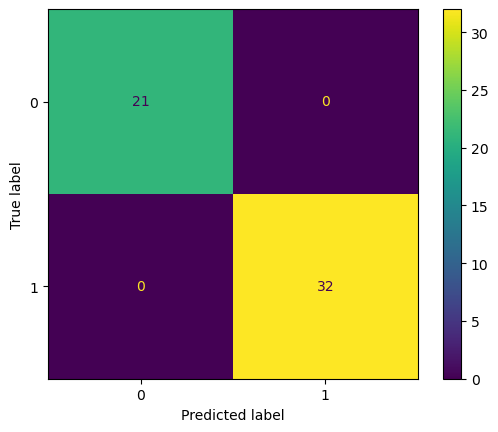

In [269]:
d = ConfusionMatrixDisplay(confusion_matrix(test_data.labels,y_pred))
d.plot();

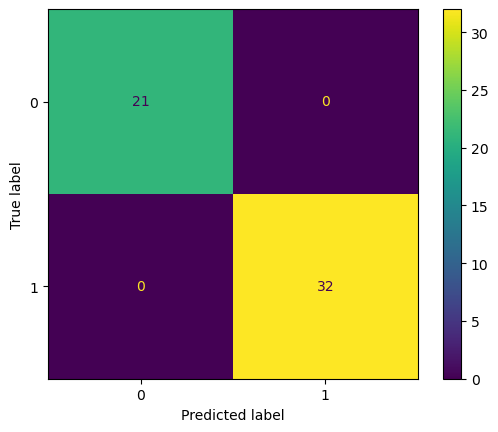

In [273]:
f = ConfusionMatrixDisplay(confusion_matrix(test_data.classes[test_data.index_array],y_pred))
f.plot();